# FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. The task is to perform the data analysis to find answers to key questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [3]:
# get the number of rows and columns int the data
df.shape

(1898, 9)

#### Observations:


The DataFrame has 1898 rows and 9 columns.

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


1. **order_id, customer_id, preparation_time** and **delivery_time** are of "integer" data types.
2. **cost_of_the_order** has the "float" data type.
3. **restaurant_name, cuisine_type, day_of_the_week** and **rating** have "string" data types.

### Checking for missing values

In [5]:
# get the sum of the number of null values in each column
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


As seen in the output above, there are no missing values in the data.

### Statistical summary

In [6]:
# display a statistical summary of numerical columns in the data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:


* The average time it takes for food to be prepared once an order is made is 27 minutes, the minimun time is 20 minutes while the maximum time is 35 minutes.
* Cost of orders ranges from 7 to 35 dollars.
* Average delivery time is about 24 minutes.

### Let's check how many orders are not rated

In [7]:
# extract the number of rows in the rating column with values as 'Not given'
df.loc[df['rating']=='Not given'].shape[0]

736

#### Observations:


There are a total of 736 orders that are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### Let's explore all the variables and provide observations on their distributions.

We don't necessarily have to explore the order_id and customer_id columns as they don't have much explanations to the problem at hand. So we go ahead and examine the rest columns. 
Let us check the number of unique values in the restaurant_name and cuisine_type columns.

#### Observations on restaurant_name

In [8]:
# get the number of the different restaurants in the dataframe
df['restaurant_name'].nunique()

178

There are a total of 178 different restaurants in the Dataset.

#### Observations on cuisine_type

In [9]:
# compute how may unique cuisines in the dataframe
df['cuisine_type'].nunique()

14

There are 14 different cuisines in the Dataset.

#### Now let us observe the remaining variables with some visualizations.

#### Observations on cost_of_the_order

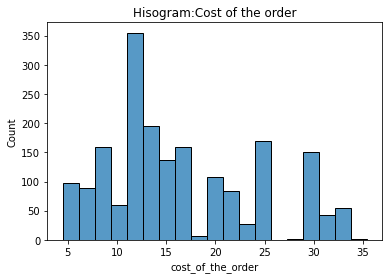

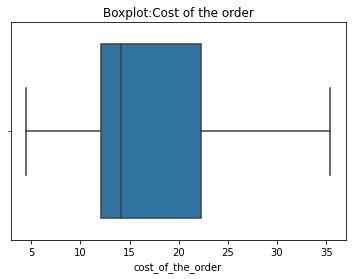

In [10]:
# plot histogram and boxplot for cost_of_the_order
plt.title('Hisogram:Cost of the order')
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
plt.title('Boxplot:Cost of the order')
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

* The distribution of cost_of_the_order is right-skewed.
* There are no outliers in this column.
* Almost half of the orders cost 14 dollars or less.
* 50% of cost of orders lie between 12 and 23 dollars.

#### Observations on day_of_the_week

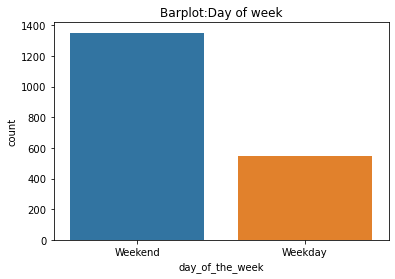

In [11]:
# create a barplot for day_of_the_week
plt.title('Barplot:Day of week')
sns.countplot(data=df,x='day_of_the_week');

The number of orders on weekends is more that twice the number of orders on weekdays.

#### Observations on rating

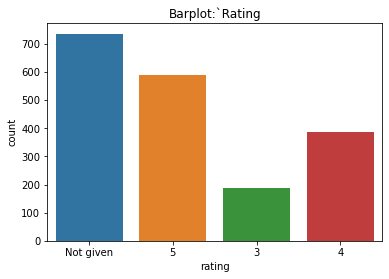

In [12]:
# plot a countplot for rating
plt.title('Barplot:`Rating')
sns.countplot(data=df,x='rating');

* The group of people who did not give a rating have the highest count.
* More people gave a rating of 5, the next highest is 4 and fewer people gave a rating of 3.

#### Observations on food_preparation_time

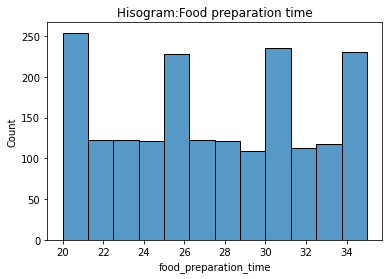

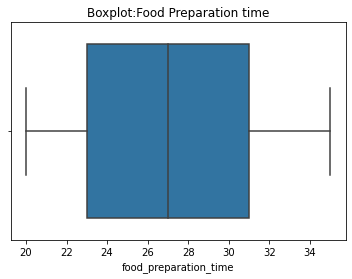

In [13]:
# Plot a Histogram and Boxplot for food_preparation_time 
plt.title('Hisogram:Food preparation time')
sns.histplot(data=df,x='food_preparation_time')
plt.show()
plt.title('Boxplot:Food Preparation time')
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

* There are no outliers in the column
* The median food preparation time is about 27 minutes.
* There seems to be some pattern in the distribution of food_preparation_time, kind of multimodal.

#### Observations on delivery_time

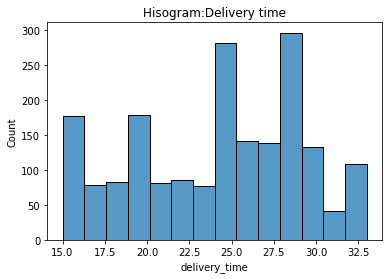

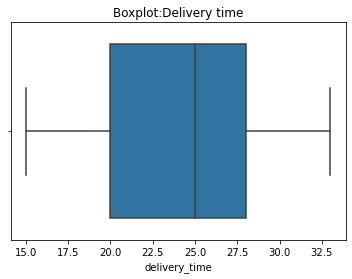

In [14]:
# plot a histogram and boxplot for delivery_time
plt.title('Hisogram:Delivery time')
sns.histplot(data=df,x='delivery_time')
plt.show()
plt.title('Boxplot:Delivery time')
sns.boxplot(data=df,x='delivery_time')
plt.show()

* There are no outliers in the column
* The distribution of delivery time is slightly left-skewed
* 50% of orders are delivered between 20 and 28 minutes


### Top 5 restaurants in terms of the number of orders received

In [15]:
# calculate the top 5 restaurants with the highest number of orders.
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations: 
The top five restaurants in terms of orders recieved are: 
* Shake Shack
* The Meatball Shop
* Blue Ribbon Sushi
* Blue Ribbon Fried Chicken
* Parm


### Most popular cuisine on weekends

In [16]:
# get the cuisine with the highest number of orders on weekends
df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:
The most popular cuisine on weekends is American.

### Percentage of the orders that cost more than 20 dollars

In [17]:
# get the dataframe of values where cost_of_the_order is greater than 20
df_more_than_20 = df[df['cost_of_the_order']>20]

In [18]:
# divide the number of rows in df_more_than_20 above by the number of rows in the original dataframe
df_more_than_20.shape[0]/df.shape[0]

0.2924130663856691

#### Observations:

29 Percent of orders cost more than 20 dollars.

### Top 3 most frequent customers

In [19]:
# get the IDs and number of orders of the top 3 customers using value_counts() 
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

#### Observations:
The top 3 most frequent customers and their respective number of orders are:
1. customer_id 52832: 13 orders
2. customer_id 47440: 10 orders
3. customer_id 83287: 9 orders

### Multivariate Analysis

### Let us use a Heatmap to observe the correlation between the numerical columns.

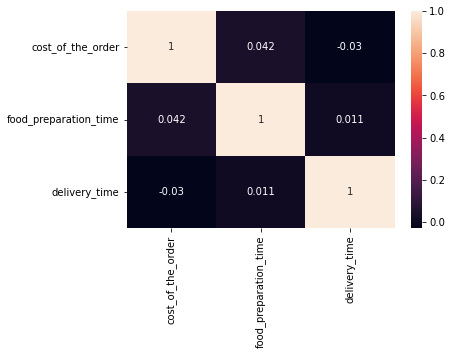

In [20]:
# plot a heatmap of cost_of_the_order, food_preparation_time and delivery_time
sns.heatmap(data=df[['cost_of_the_order','food_preparation_time','delivery_time']].corr(),annot=True);

There isn't any strong correlations between the columns.

### Let us observe the relationships between categorical and numerical variables.

#### delivery_time and day_of_the_week

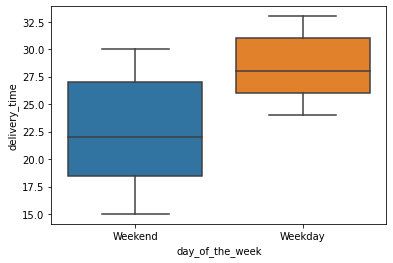

In [21]:
# make a boxplot with delivery_time on y-axis and day_of_the_week on x-axis
sns.boxplot(data=df, x='day_of_the_week',y='delivery_time')
plt.show()

* Orders take at least about 24 minutes to deliver on weekdays which is higher than weekends which has at least 15 minutes delivery time.
* Weekends have a wider range of delivery times, this can be traced to a higher number of deliveries on weekends.

#### cuisine_type and rating

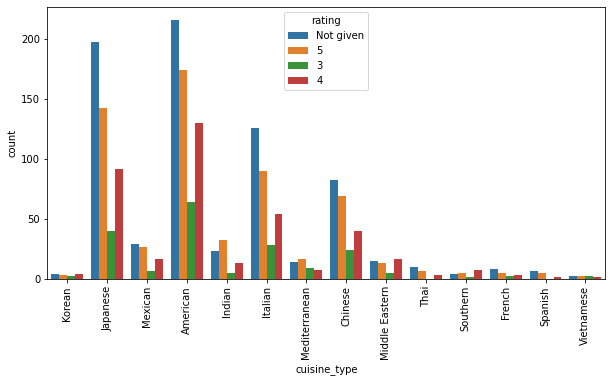

In [22]:
# make a countplot of cuisine_type with respect to rating
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='cuisine_type',hue='rating')
plt.xticks(rotation=90)
plt.show()

The top four cuisines with respect to ratings count are:
1. American
2. Japanese
3. Italian
4. Chinese

#### cuisine_type and cost_of_order 

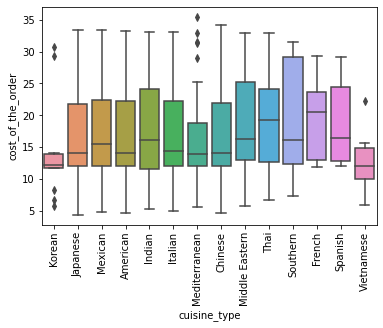

In [23]:
# make a boxplot of cuisine_type and cost_of_the_order
sns.boxplot(data=df, x='cuisine_type',y='cost_of_the_order')
plt.xticks(rotation=90)
plt.show()

* Average cost of orders for French cuisines is higher than the rest.
* Vietnamese cuisines have the lowest average cost.
* There are outliers in the distribution of Korean, Mediterranean and Vietnamese cuisines which shows that some orders cost way more than the others. For Korean cuisines, there are some orders that cost much lower than most of the observations..

#### cuisine_type and preparation_time

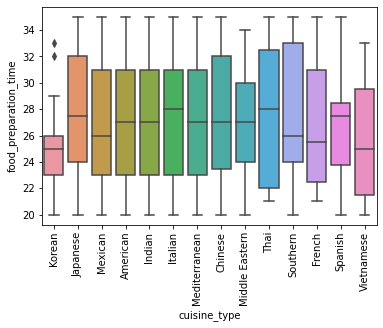

In [24]:
# plot a boxplot of cuisine_type and food_preparation_time
sns.boxplot(data=df, x='cuisine_type',y='food_preparation_time')
plt.xticks(rotation=90)
plt.show()

* Korean cuisines have the smallest preparation time range (except for a few outliers), follwed by Vietnamese cuisines.
* Southern cuisines are right-skewed, indicating that there's a higher concentration of data points on the cuisines that take 25 minutes or less to prepare.
* Observation on the preparation time of American, Indian and Mediterranean cuisines are almost normally distributed.

#### rating and food_preparation_time

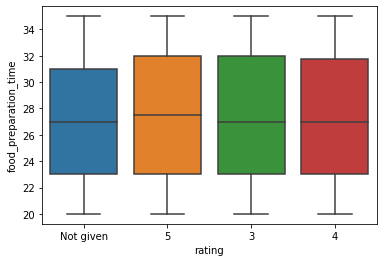

In [25]:
# plot a boxplot of rating and food_preparation_time
sns.boxplot(data=df, x='rating',y='food_preparation_time');

* Orders that got a rating of 5 have a slightly higher average preparation time (27.5 minutes), but in general the average preparation time is almost the same for categories of rating.

#### rating and delivery_time

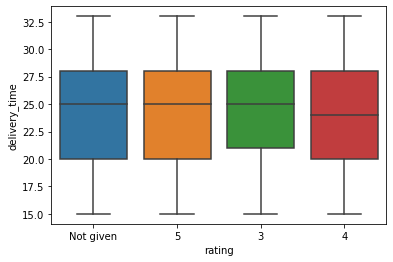

In [26]:
# plot a boxplot of rating and _delivery_time
sns.boxplot(data=df, x='rating',y='delivery_time');

* The average delivey time for orders that got a rating of 4 is 23.5 minutes which is slightly lower than the rest which all have an average delivery time of 25 minutes.
* The observations of delivery times of orders with rating 4 are normally distributed, ratings 5 and 'Not given' are left-skewed while rating 3 is slightly left-skewed.

#### rating and cost of order

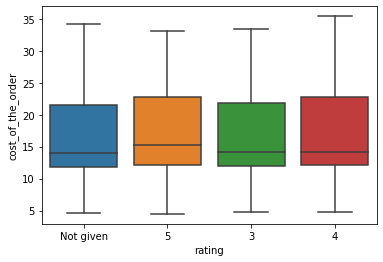

In [27]:
# plot a boxplot of rating and cost_of_the_order
sns.boxplot(data=df, x='rating',y='cost_of_the_order');

* The distributions are right-skewed across all the rating categories, showing a higher concentration of rating on foods that cost 15 dollars or less. 

### Restaurants with ratings count of more than 50 and average rating greater than 4

In [28]:
# create a new dataframe excluding the rows with values 'Not given'
df_ratings = df[df['rating']!='Not given'].reset_index()
df_ratings

,index,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
1,3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
2,4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
3,5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
4,7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
...,...,...,...,...,...,...,...,...,...,...
1157,1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1158,1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1159,1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1160,1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


In [29]:
# convert the values of the ratings column in the new dataframe to integer
df_ratings['rating'] = df_ratings['rating'].astype(int)
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  1162 non-null   int64  
 1   order_id               1162 non-null   int64  
 2   customer_id            1162 non-null   int64  
 3   restaurant_name        1162 non-null   object 
 4   cuisine_type           1162 non-null   object 
 5   cost_of_the_order      1162 non-null   float64
 6   day_of_the_week        1162 non-null   object 
 7   rating                 1162 non-null   int64  
 8   food_preparation_time  1162 non-null   int64  
 9   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 90.9+ KB


In [30]:
# get the names of the restaurants and their ratings count and resetting their indices
df_ratings_count = df_ratings.groupby(['restaurant_name'])[['rating']].count().reset_index()
df_ratings_count

,restaurant_name,rating
0,'wichcraft,1
1,12 Chairs,2
2,5 Napkin Burger,2
3,67 Burger,1
4,Amma,2
...,...,...
151,Zero Otto Nove,1
152,brgr,1
153,da Umberto,1
154,ilili Restaurant,13


In [31]:
# display the restaurants with ratings count greater than 50
df_ratings_above50 = df_ratings_count[df_ratings_count['rating']>50]
df_ratings_above50

,restaurant_name,rating
16,Blue Ribbon Fried Chicken,64
17,Blue Ribbon Sushi,73
117,Shake Shack,133
132,The Meatball Shop,84


In [32]:
# create a new dataframe containing the restaurants with ratings count greater than 50
df_new = df_ratings[df_ratings['restaurant_name'].isin(df_ratings_above50['restaurant_name'])]
df_new.head()

,index,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1,3,1477334,106968,Blue Ribbon Fried Chicken,American,29.2,Weekend,3,25,15
8,12,1476966,129969,Blue Ribbon Fried Chicken,American,24.3,Weekend,5,23,17
10,15,1477414,66222,Shake Shack,American,16.2,Weekend,5,33,25
12,19,1477354,67487,Blue Ribbon Sushi,Japanese,16.2,Weekend,4,35,26
14,22,1478287,150599,Shake Shack,American,29.1,Weekday,5,21,30


In [33]:
df_new.groupby(['restaurant_name'])['rating'].mean()

restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating, dtype: float64

#### Observations: The restaurants that qualify to get the promotional offer are:
* Blue Ribbon Fried Chicken   
* Blue Ribbon Sushi            
* Shake Shack                  
* The Meatball Shop

### The company charges the restaurants 25% on the orders that cost more than 20 dollars and 15% on the orders that cost more than 5 dollars. Let's find the net revenue generated by the company across all orders.

In [34]:
# create a function that loops through every row in the cost_of_the_order column with specified conditions and returns
# corresponding results as revenues
def revenue_cal(*arg):
    revenue = []
    result = 0
    for i in df['cost_of_the_order'].index:
        if df['cost_of_the_order'][i]>20.0:
            result = df['cost_of_the_order'][i]*0.20
            revenue.append(result)
        elif df['cost_of_the_order'][i]>5.0 and df['cost_of_the_order'][i] <=20.0:
            result = df['cost_of_the_order'][i]*0.15
            revenue.append(result)
        else:
            result = df['cost_of_the_order'][i]*0.00
            revenue.append(result)
    return revenue   
    

In [35]:
# call the function on the revenue column
revenue_list = revenue_cal(df['cost_of_the_order'])

In [36]:
# create a new column 'revenue' to the dataframe using the resulting list from the cell above
df['revenue'] = revenue_list
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,6.1500
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,5.8400
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


#### Observations:


### Let's find what percentage of orders take more than 60 minutes to get delivered from the time the order is placed.

In [37]:
# calculate the total time by adding the food_preparation_time and delivery_time columns
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']
# quick look at the number of rows and columns
df[df['total_delivery_time']>60].shape

(200, 11)

In [38]:
# divide the number of rows in the result above by the number of rows in the original dataframe
df[df['total_delivery_time']>60].shape[0]/df.shape[0]

0.1053740779768177

#### Observations:
About 10.5 percent of orders take more than 60 minutes to get delivered.


### Let's analyze average delivery times during weekdays and weekends and see how they vary.

In [39]:
# splitting the data into two, with respect to weekdays and weekends
df_weekday = df[df['day_of_the_week']=='Weekday']
df_weekend = df[df['day_of_the_week']=='Weekend']

In [40]:
# calculate the mean delivery_time of weekday data
df_weekday['delivery_time'].mean()

28.340036563071298

In [41]:
# calculate the mean delivery_time of weekend data
df_weekend['delivery_time'].mean()

22.4700222057735

#### Observations:
On the average, it takes longer to deliver on weekdays than on weekends.


### Conclusion and Recommendations

### Conclusions:
#### From the analysis we can conclude that:
* There are more orders on weekends than weekdays
* It takes longer time to deliver on weekdays than weekends, this might be as a result of higher road traffic congestions on weekdays.
* There's higher number of orders within the price range of 5 to 14 dollars, and there are more ratings on this price range.
* About 60% of customers gave ratings while 40% gave no ratings.
* It takes about 24 minutes on the average to deliver an order.
* The top 5 restaurants in terms of orders recieved are; Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm.
* American cuisines are the highest in terms of ratings

### Recommendations:

* American, Japanese, Italian and Chinese cuisines are the biggest markets for Foodhub.
* Providing promotional offers for the top restaurants with high ratings can be a good business initiative.
* Feedbacks are important in any business. Incentives can be introduced to customers, some kind of reward they can get when they give ratings.
* The company can conduct Ad campaigns for more delivery drivers to help reduce the time it takes for food to be delivered.

---